In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095467 sha256=95781545623858346654370bd8fc44c0f498c3c1b0a85d20ebc05f420eb54ce6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.reader import Reader

In [ ]:
data = Dataset.load_builtin('ml-100k', prompt = False)

Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
from surprise import BaselineOnly
bsl_options = {'method': 'sgd',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([0.95806696, 0.95951164, 0.96131773]),
 'fit_time': (0.19478702545166016, 0.20371770858764648, 0.1404285430908203),
 'test_time': (0.40460968017578125, 0.23876690864562988, 0.14621734619140625)}

In [ ]:
from surprise import BaselineOnly
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.94623174, 0.93789515, 0.94682962]),
 'fit_time': (0.09866476058959961, 0.12665843963623047, 0.1322481632232666),
 'test_time': (0.2760622501373291, 0.14032721519470215, 0.2742328643798828)}

> Question: Change the method parameter by replacing sgd by als. Is the rms improving?

In [ ]:

# Let's use SVD seen in the course.
algo = SVD()
#  5-fold cross-validation showing results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9320  0.9355  0.9467  0.9277  0.9346  0.9353  0.0063  
MAE (testset)     0.7337  0.7357  0.7468  0.7328  0.7357  0.7369  0.0051  
Fit time          1.25    1.24    1.25    1.26    1.23    1.25    0.01    
Test time         0.14    0.14    0.28    0.14    0.14    0.17    0.05    


{'test_rmse': array([0.93200832, 0.93550262, 0.94665359, 0.92769371, 0.93458457]),
 'test_mae': array([0.73371036, 0.73569575, 0.74679583, 0.73280705, 0.73568002]),
 'fit_time': (1.245760202407837,
  1.2393302917480469,
  1.2534496784210205,
  1.2626371383666992,
  1.2281136512756348),
 'test_time': (0.13872694969177246,
  0.14363384246826172,
  0.2778759002685547,
  0.1418907642364502,
  0.1419200897216797)}

## this SVD  is said to be biased:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms

## we will specify the optimal number of factors using GreadSearchCV.

In [ ]:
param_grid = {'n_factors': [4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# the best RMSE
print(gs.best_score['rmse'])

# parameters behind this performance
print(gs.best_params['rmse'])

0.9339440497557654
{'n_factors': 14}


## To get this number of factors in a more concise way, we will use cross-validation by proving it graphically

In [ ]:
def rmse_vs_factors(algorithm, data):



    rmse_algorithm = []

    for k in range(4,20,1):
        algo = algorithm(n_factors = k)

        #["test_rmse"] is a numpy array with the min RMSE in each test set
        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean()
        rmse_algorithm.append(loss_fce)

    return rmse_algorithm

In [ ]:
rmse_svd = rmse_vs_factors(SVD,data)

In [ ]:
def plot_rmse(rmse, algorithm):
    plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

    plt.subplot(2,1,1)
    plt.plot(rmse)
    plt.xlim(0,20)
    plt.title("{0} Performance: RMSE contre le nbre de Facteurs".format(algorithm), size = 20 )
    plt.ylabel("Mean RMSE (cv=5)")

    plt.subplot(2,1,2)
    plt.plot(rmse)
    plt.xlim(0,20)
    plt.xticks(np.arange(0, 20, step=2))

    plt.xlabel("{0}(facteur = k)".format(algorithm))
    plt.ylabel("Mean RMSE (cv=5)")
    plt.axvline(np.argmin(rmse), color = "r")



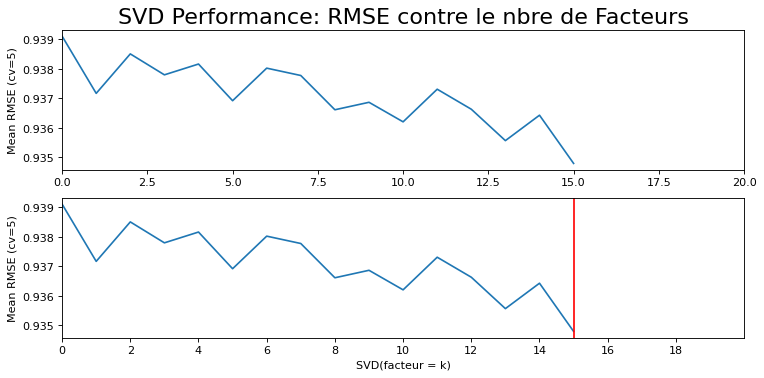

In [ ]:
plot_rmse(rmse_svd,"SVD")

### Questions:

the different parameters of the SVD: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms
also: https://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly

1. Using GridSearchCV show the best combination of parameters for the baselineonly version
2. Using GridSearchCV, display the best combination of parameters for the biased version
3. Same question for the unbiased version
4. redo the same work (i.e., 1 and 2 and 3) using RandomizedSearchCV

##  GridSearchCV show the best combination of parameters for the baselineonly version

In [ ]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin('ml-100k')

param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg_u': [10, 15, 20],
                              'reg_i': [5, 7, 9]}
             }


algo = BaselineOnly()
gs = GridSearchCV(algo_class=BaselineOnly, param_grid=param_grid, measures=['rmse'], cv=5, refit=True)
gs.fit(data)

print('Best RMSE score:', gs.best_score['rmse'])
print('Best parameters:', gs.best_params['rmse'])


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

##  GridSearchCV show the best combination of parameters for the biased version

In [ ]:

# Define the parameter grid
param_grid = {'n_factors': [50, 100, 200],
              'n_epochs': [20, 30, 40],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]
             }

algo = SVD(biased=True)
gs = GridSearchCV(algo_class=SVD, param_grid=param_grid, measures=['rmse'], cv=5, refit=True)
gs.fit(data)

print('Best RMSE score:', gs.best_score['rmse'])
print('Best parameters:', gs.best_params['rmse'])


Best RMSE score: 0.9103306716476552
Best parameters: {'n_factors': 100, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}


##  GridSearchCV show the best combination of parameters for the unbiased version

In [ ]:

# Define the parameter grid
param_grid = {'n_factors': [50, 100, 200],
              'n_epochs': [20, 30, 40],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]
             }

algo = SVD(biased=False)
gs = GridSearchCV(algo_class=SVD, param_grid=param_grid, measures=['rmse'], cv=5, refit=True)
gs.fit(data)
print('Best RMSE score:', gs.best_score['rmse'])
print('Best parameters:', gs.best_params['rmse'])


Best RMSE score: 0.9105326371031568
Best parameters: {'n_factors': 200, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}


##  RandomizedSearchCV show the best combination of parameters for the baselineonly version

In [ ]:
from surprise.model_selection import RandomizedSearchCV


param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg_u': [10, 15, 20],
                              'reg_i': [5, 7, 9]}
             }

algo = BaselineOnly()
rs = RandomizedSearchCV(algo_class=BaselineOnly, param_distributions=param_grid, measures=['rmse'], cv=5, n_iter=10, refit=True)
rs.fit(data)
print('Best RMSE score:', gs.best_score['rmse'])
print('Best parameters:', gs.best_params['rmse'])


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

##  RandomizedSearchCV show the best combination of parameters for the biased version

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import RandomizedSearchCV

# Load the dataset
data = Dataset.load_builtin('ml-100k')

# Define the parameter distributions for randomized search
param_distributions = {'n_factors': [50, 100, 200],
                       'n_epochs': [20, 30, 40],
                       'lr_all': [0.002, 0.005, 0.01],
                       'reg_all': [0.02, 0.1, 0.2]
                      }

algo = SVD(biased=True)
rs = RandomizedSearchCV(algo_class=SVD, param_distributions=param_distributions, measures=['rmse'], cv=5, refit=True)
rs.fit(data)

print('Best RMSE score:', rs.best_score['rmse'])
print('Best parameters:', rs.best_params['rmse'])


Best RMSE score: 0.9102681480456123
Best parameters: {'n_factors': 200, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}


##  RandomizedSearchCV show the best combination of parameters for the unbaised version

In [ ]:
param_distributions = {'n_factors': [50, 100, 200],
                       'n_epochs': [20, 30, 40],
                       'lr_all': [0.002, 0.005, 0.01],
                       'reg_all': [0.02, 0.1, 0.2]
                      }

random.seed(42)

algo = SVD(biased=False)
rs = RandomizedSearchCV(algo_class=SVD, param_distributions=param_distributions, measures=['rmse'], cv=5, refit=True, n_iter=10)
rs.fit(data)

print('Best RMSE score:', rs.best_score['rmse'])
print('Best parameters:', rs.best_params['rmse'])


Best RMSE score: 0.9197405554838373
Best parameters: {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}
